# Risk of Loan Defaults

**Objective**

The bank's loan division is seeking to build a **credit scoring system** based on past internal data that evaluates a potential customer's likelihood to repay a loan. This analysis will help to determine what customer characteristics may be correlated with a defaulted loan in effort to decrease the overall default rate on loans.

**Data Description**

<code>credit_scoring_eng</code>: table with customer characteristics and whether they defaulted a loan.

- **<code>children</code>:** the number of children in the family
- **<code>days_employed</code>:** how long the customer has been working
- **<code>dob_year</code>:** the customer’s age
- **<code>education</code>:** the customer’s education level
- **<code>education_id</code>:** identifier for the customer’s education
- **<code>family_status</code>:** the customer’s marital status
- **<code>family_status_id</code>:** identifier for the customer’s marital status
- **<code>gender</code>:** the customer’s gender
- **<code>income_type</code>:** the customer’s income type
- **<code>debt</code>:** whether the customer has ever defaulted on a loan
- **<code>total_income</code>:** monthly income
- **<code>purpose</code>:** reason for taking out a loan

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Data-exploration-and-pre-processing" data-toc-modified-id="Data-exploration-and-pre-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exploration and pre-processing</a></span><ul class="toc-item"><li><span><a href="#Incorrect-data" data-toc-modified-id="Incorrect-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Incorrect data</a></span></li><li><span><a href="#Duplicate-data" data-toc-modified-id="Duplicate-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Duplicate data</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Missing values</a></span></li></ul></li><li><span><a href="#Categorization-of-data" data-toc-modified-id="Categorization-of-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Categorization of data</a></span><ul class="toc-item"><li><span><a href="#Categorizing-by-Family-status-and-Children" data-toc-modified-id="Categorizing-by-Family-status-and-Children-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Categorizing by Family status and Children</a></span></li><li><span><a href="#Categorizing-by-Purpose" data-toc-modified-id="Categorizing-by-Purpose-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Categorizing by Purpose</a></span></li><li><span><a href="#Categorizing-by-new_income" data-toc-modified-id="Categorizing-by-new_income-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Categorizing by new_income</a></span></li></ul></li><li><span><a href="#Checking-the-Hypotheses" data-toc-modified-id="Checking-the-Hypotheses-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Checking the Hypotheses</a></span></li><li><span><a href="#General-conclusions" data-toc-modified-id="General-conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>General conclusions</a></span><ul class="toc-item"><li><span><a href="#Limitations" data-toc-modified-id="Limitations-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Limitations</a></span></li><li><span><a href="#Summary-of-findings" data-toc-modified-id="Summary-of-findings-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Summary of findings</a></span></li></ul></li></ul></div>

## Setup

**Install & update libraries**

In [1]:
# Loading all the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

**Load and optimize data**

In [2]:
# Load the data
credit_score = pd.read_csv(r'C:\Users\Talia\Downloads\credit_scoring_eng.csv')
credit_score.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [3]:
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
#change data types to save memory space 
credit_score[['gender', 'education','education_id','family_status','income_type']]= credit_score[['gender', 'education','education_id','family_status','income_type']].astype('category')
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21525 non-null  int64   
 1   days_employed     19351 non-null  float64 
 2   dob_years         21525 non-null  int64   
 3   education         21525 non-null  category
 4   education_id      21525 non-null  category
 5   family_status     21525 non-null  category
 6   family_status_id  21525 non-null  int64   
 7   gender            21525 non-null  category
 8   income_type       21525 non-null  category
 9   debt              21525 non-null  int64   
 10  total_income      19351 non-null  float64 
 11  purpose           21525 non-null  object  
dtypes: category(5), float64(2), int64(4), object(1)
memory usage: 1.3+ MB


- By changing the dtypes, a significant amount of memory usage was saved.

## Data exploration and pre-processing

**High level and missing values**

In [5]:
#distribution of dataset
credit_score.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.0,21525,21525.000000,21525,21525,21525.000000,19351.000000,21525
unique,NaN,NaN,NaN,15,5.0,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,1.0,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,15233.0,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,NaN,NaN,0.972544,NaN,NaN,0.080883,26787.568355,NaN
std,1.381587,140827.311974,12.574584,NaN,NaN,NaN,1.420324,NaN,NaN,0.272661,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


In [6]:
# Print first 10 rows
credit_score.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [7]:
# Get info on data
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21525 non-null  int64   
 1   days_employed     19351 non-null  float64 
 2   dob_years         21525 non-null  int64   
 3   education         21525 non-null  category
 4   education_id      21525 non-null  category
 5   family_status     21525 non-null  category
 6   family_status_id  21525 non-null  int64   
 7   gender            21525 non-null  category
 8   income_type       21525 non-null  category
 9   debt              21525 non-null  int64   
 10  total_income      19351 non-null  float64 
 11  purpose           21525 non-null  object  
dtypes: category(5), float64(2), int64(4), object(1)
memory usage: 1.3+ MB


In [8]:
# Filtered table with the the first column with missing data
credit_score_filtered_null=credit_score[credit_score['days_employed'].isna()]
credit_score_filtered_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          2174 non-null   int64   
 1   days_employed     0 non-null      float64 
 2   dob_years         2174 non-null   int64   
 3   education         2174 non-null   category
 4   education_id      2174 non-null   category
 5   family_status     2174 non-null   category
 6   family_status_id  2174 non-null   int64   
 7   gender            2174 non-null   category
 8   income_type       2174 non-null   category
 9   debt              2174 non-null   int64   
 10  total_income      0 non-null      float64 
 11  purpose           2174 non-null   object  
dtypes: category(5), float64(2), int64(4), object(1)
memory usage: 148.1+ KB


In [9]:
#Calculate the percentage of the missing values compared to the whole dataset.
filtered_table_nan=credit_score[(credit_score['days_employed'].isna()) & (credit_score['total_income'].isna())]
if filtered_table_nan.shape[0]/credit_score.shape[0]<=0.06:
    print("Not so much data missing:",'{:.0%}'.format(filtered_table_nan.shape[0]/credit_score.shape[0]))    
elif filtered_table_nan.shape[0]/credit_score.shape[0]<=0.11:
    print("Medium amount of data missing:",'{:.0%}'.format(filtered_table_nan.shape[0]/credit_score.shape[0]))    
else: 
    print("Too much data missing:",'{:.0%}'.format(filtered_table_nan.shape[0]/credit_score.shape[0]))

Medium amount of data missing: 10%


**Initial observations:**

1. The days_employed column has negative values. 
2. The entry at index[4] has been employed for about 93 years.
3. Entries in the education column contain both upercase and lowercase (e.g., 'secondary education' and 'Secondary Education').
4. The entries in the total income column have 3 decimal places (instead of 2).
5. The entries in the purpose column are not uniform indicating that they were likely entered by free-write. 
Some are also vague like 'housing transactions'.
6. The first 10 entries in the debt column are all 0. More exploration needed to see what entries in this column look like.
7. The columns days_employed and total_income contain the same number of missing values (2,174) from the same rows. It is logical that without knowing the number of days imployed, the total income cannot be calculated.
8. About 10% of the rows in the dataset contain missing values; 5% is a common accepted threshhold to not be concerned with missing values so we will need to investigate further. 

**<u>Next steps:</u>**
1. Explore whether the missing data is due to a specific client characteristic, such as income type or debt. (I do not see a reason why the missing values would relate to another characteristic.)

In [10]:
#Check to see if there is a connection between missing data and a specific client characteristic:
columns = ['income_type', 'debt']

missing_values = []

                                       
for value in columns:
 
    filtered_data = credit_score[credit_score['days_employed'].isna()][value].value_counts()/credit_score[value].value_counts()
    missing_values.append(filtered_data)

print('Count of missing income_type values by days_employed:')
print(missing_values[0].apply(lambda x: "{:0.0%}".format(x)))
print()

print('Count of missing debt values by debt:')
print(missing_values[1].apply(lambda x: "{:0.0%}".format(x)))
print()

Count of missing income_type values by days_employed:
business                       10%
civil servant                  10%
employee                       10%
entrepreneur                   50%
paternity / maternity leave     0%
retiree                        11%
student                         0%
unemployed                      0%
Name: income_type, dtype: object

Count of missing debt values by debt:
0    10%
1    10%
Name: debt, dtype: object



In [11]:
# Checking distribution of filtered table without null values
filtered_table_not_nan = credit_score[credit_score.notnull()]
filtered_table_not_nan.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.0,21525,21525.000000,21525,21525,21525.000000,19351.000000,21525
unique,NaN,NaN,NaN,15,5.0,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,1.0,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,15233.0,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,NaN,NaN,0.972544,NaN,NaN,0.080883,26787.568355,NaN
std,1.381587,140827.311974,12.574584,NaN,NaN,NaN,1.420324,NaN,NaN,0.272661,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


In [12]:
# Checking distribution of table with null values (as done above; redoing here for side-by-side comparison purposes.)
credit_score.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.0,21525,21525.000000,21525,21525,21525.000000,19351.000000,21525
unique,NaN,NaN,NaN,15,5.0,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,1.0,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,15233.0,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,NaN,NaN,0.972544,NaN,NaN,0.080883,26787.568355,NaN
std,1.381587,140827.311974,12.574584,NaN,NaN,NaN,1.420324,NaN,NaN,0.272661,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


**Possible reasons for missing values in data**

- Although, 50% of clients with entrepreneur values have missing data in the fields in question, this is insignificant as only 2 clients are entrepreneurs (to be addressed later).  

- It is unclear why certan values in the days_employed and total_income fields are missing. Removing them does not significantly alter the distribution and they do not seem to be related to any other client characteristic. Likely the clients were either unemployed at the time they were entered into the database or at the time of the export, depending on protocol for the frequency at which the database is updated.


**Considerations for addressing missing columns**

- Since the total_income is integral to the analysis, I will fill them in after I address duplicates; although the distributions of the dataset with and dataset without null values are very similar, the larger the dataset the better. However, the overall findings should not be affected one way or another. 
- Since the days_employed column is not necessary to answer the proposed questions, I am inclined to not fill in the missing values, unless there is a clear way to do so. Otherise, I am inclined to delete the column altogether as null values may affect locating duplicates (as possibly all other data in the same row is identical, but won't seem to be because of duplicates).

**<u>Next Steps</u>:**
1. Uncover incorrect and duplicate data.

### Incorrect data

**Education field**

In [13]:
# Values in education column to check if and what spellings will need to be fixed
credit_score['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [14]:
# Check that duplicates all match to the correct education_id
credit_score.pivot_table(index=['education_id','education'],values='children', aggfunc='count')

children
education_id education                    
0            BACHELOR'S DEGREE         274
             Bachelor's Degree         268
             bachelor's degree        4718
1            SECONDARY EDUCATION       772
             Secondary Education       711
             secondary education     13750
2            SOME COLLEGE               29
             Some College               47
             some college              668
3            PRIMARY EDUCATION          17
             Primary Education          15
             primary education         250
4            GRADUATE DEGREE             1
             Graduate Degree             1
             graduate degree             4

- Each education_id has 3 format options for the corresponding category.
- The numbering in the education_id column is not intuitive; the lower the education level, the lower the id should be, but it's mixed up.

**<u>Next Steps</u>:**
1. Make all values for the education field lowercase.
2. Make the education_id and corresponding education values more intuitively related.

In [15]:
#Covert all values to lower case 
credit_score['education'] = credit_score['education'].str.lower()
credit_score['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

In [16]:
# Use a dictionary to convert the values in education_id so that they are more intuitive.
education_dict = {3:1, 1:2, 2:3,0:4,4:5}
credit_score=credit_score.replace({"education_id": education_dict})
credit_score.pivot_table(index=['education_id','education'],values='children', aggfunc='count')

,,children
education_id,education,
1,primary education,282
2,secondary education,15233
3,some college,744
4,bachelor's degree,5260
5,graduate degree,6


**Children field**

In [17]:
# The distribution of values in the `children` column
credit_score['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [18]:
#Investigate rows with 20 children.
credit_score[credit_score['children']==20].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,-880.221113,21,secondary education,2,married,0,M,business,0,23253.578,purchase of the house
720,20,-855.595512,44,secondary education,2,married,0,F,business,0,18079.798,buy real estate
1074,20,-3310.411598,56,secondary education,2,married,0,F,employee,1,36722.966,getting an education
2510,20,-2714.161249,59,bachelor's degree,4,widow / widower,2,F,employee,0,42315.974,transactions with commercial real estate
2941,20,-2161.591519,0,secondary education,2,married,0,F,employee,0,31958.391,to buy a car
3302,20,NaN,35,secondary education,2,unmarried,4,F,civil servant,0,NaN,profile education
3396,20,NaN,56,bachelor's degree,4,married,0,F,business,0,NaN,university education
3671,20,-913.161503,23,secondary education,2,unmarried,4,F,employee,0,16200.879,buying a second-hand car
3697,20,-2907.910616,40,secondary education,2,civil partnership,1,M,employee,0,18460.911,buying a second-hand car
3735,20,-805.044438,26,bachelor's degree,4,unmarried,4,M,employee,0,21952.103,housing renovation


In [19]:
#Investigate rows with 20 children.
credit_score[credit_score['children']==-1].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
291,-1,-4417.703588,46,secondary education,2,civil partnership,1,F,employee,0,16450.615,profile education
705,-1,-902.084528,50,secondary education,2,married,0,F,civil servant,0,22061.264,car purchase
742,-1,-3174.456205,57,secondary education,2,married,0,F,employee,0,10282.887,supplementary education
800,-1,349987.852217,54,secondary education,2,unmarried,4,F,retiree,0,13806.996,supplementary education
941,-1,NaN,57,secondary education,2,married,0,F,retiree,0,NaN,buying my own car
1363,-1,-1195.264956,55,secondary education,2,married,0,F,business,0,11128.112,profile education
1929,-1,-1461.303336,38,secondary education,2,unmarried,4,M,employee,0,17459.451,purchase of the house
2073,-1,-2539.761232,42,secondary education,2,divorced,3,F,business,0,26022.177,purchase of the house
3814,-1,-3045.290443,26,secondary education,2,civil partnership,1,F,civil servant,0,21102.846,having a wedding
4201,-1,-901.101738,41,secondary education,2,married,0,F,civil servant,0,36220.123,transactions with my real estate


There are 47 entries with negative children, which is impossible and 76 with 20 children, which is unlikely (and viewing the rows in which this phenomenon occurred, did not reveal any reason this could be). There is a chance that -1 is 1 child and 20 is 2 children, but 
1. It would be odd to consistently make the negative error on 1 and never on 2+ children and the tens error on 2 and not any other number of children, and 
2. These rows represent a small fractin of the data.

Since: $$\frac{123}{21525}<1\% $$  and the children column is integral to the analysis, these rows can  be deleted without having an affect on the outcomes of the overall analysis. 

In [20]:
# delete the problematic rows
credit_score = credit_score[credit_score['children'] != -1]
credit_score = credit_score[credit_score['children'] != 20]

# Checking the `children` column again to make sure it's all fixed
credit_score['children'].value_counts()

0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

**Days_employed field**

In [21]:
#Number of clients for who started working prior to age 16, which is illegal and could indicate innacuracies.
print("Number of clients who seemingly started working before age 16:",credit_score['days_employed'][credit_score['days_employed']> credit_score['dob_years']-16].count())

#Number of clients who worked less than 0 days
print("Number of clients who seemingly worked negative days:",credit_score['days_employed'][credit_score['days_employed']<0].count())

#percent of errored data for days_employed column
print ("Percent of combined errors:",'{:.0%}'.format((credit_score['days_employed'][credit_score['days_employed']> credit_score['dob_years']-21].count()
       +
       credit_score['days_employed'][credit_score['days_employed']<0].count())/credit_score.shape[0] ))

Number of clients who seemingly started working before age 16: 3431
Number of clients who seemingly worked negative days: 15809
Percent of combined errors: 90%


**<u>Next Steps</u>:**
1. Check the values for retirees in days_employed to see if there is an easy fix. (In theory, they should all be 0.)

In [22]:
#Checking values for retirees in days_employed
credit_score[credit_score['income_type']=='retiree'].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,secondary education,2,civil partnership,1,F,retiree,0,25378.572,to have a wedding
12,0,NaN,65,secondary education,2,civil partnership,1,M,retiree,0,NaN,to have a wedding
18,0,400281.136913,53,secondary education,2,widow / widower,2,F,retiree,0,9091.804,buying a second-hand car
24,1,338551.952911,57,secondary education,2,unmarried,4,F,retiree,0,46487.558,transactions with commercial real estate
25,0,363548.489348,67,secondary education,2,married,0,M,retiree,0,8818.041,buy real estate
29,0,NaN,63,secondary education,2,unmarried,4,F,retiree,0,NaN,building a real estate
30,1,335581.668515,62,secondary education,2,married,0,F,retiree,0,27432.971,transactions with commercial real estate
35,0,394021.072184,68,secondary education,2,civil partnership,1,M,retiree,0,12448.908,having a wedding
50,0,353731.432338,63,secondary education,2,married,0,F,retiree,0,14774.837,cars
55,0,NaN,54,secondary education,2,civil partnership,1,F,retiree,1,NaN,to have a wedding


In [23]:
#Number of retirees with positive values in days_employed column
retiree_days_worked_pos=credit_score[(credit_score['income_type']=='retiree') & (credit_score['days_employed']>0)].shape[0]

retiree_days_worked_null=credit_score[(credit_score['income_type']=='retiree') & (credit_score['days_employed'].isna())].shape[0]

total_retirees=credit_score[credit_score['income_type']=='retiree'].shape[0]

print("Retirees with positive values in days_employed:",retiree_days_worked_pos)
print("Retirees with null values in days_employed:",retiree_days_worked_null)
print("Total retirees:", total_retirees)

if (retiree_days_worked_pos + retiree_days_worked_null) == total_retirees:
    print("All retiree days_employed values accounted for. Replace with 0s.")
else:
    print("Not all values accounted for.")

Retirees with positive values in days_employed: 3429
Retirees with null values in days_employed: 410
Total retirees: 3839
All retiree days_employed values accounted for. Replace with 0s.


**<u>Next Steps</u>:**

1. All values for retirees for days_employed will become 0.

(Likely a clock for days_employed is still running for certain clients after they retire making it seem like they have worked more days than they have.)

In [24]:
#Replace all values in days_employed for retirees with 0s.
credit_score['days_employed'][credit_score.income_type=='retiree'] = 0
credit_score[credit_score['income_type']=='retiree'].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,0.0,53,secondary education,2,civil partnership,1,F,retiree,0,25378.572,to have a wedding
12,0,0.0,65,secondary education,2,civil partnership,1,M,retiree,0,NaN,to have a wedding
18,0,0.0,53,secondary education,2,widow / widower,2,F,retiree,0,9091.804,buying a second-hand car
24,1,0.0,57,secondary education,2,unmarried,4,F,retiree,0,46487.558,transactions with commercial real estate
25,0,0.0,67,secondary education,2,married,0,M,retiree,0,8818.041,buy real estate


In [25]:
#Checking for any Null values left
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21402 non-null  int64   
 1   days_employed     19650 non-null  float64 
 2   dob_years         21402 non-null  int64   
 3   education         21402 non-null  object  
 4   education_id      21402 non-null  int64   
 5   family_status     21402 non-null  category
 6   family_status_id  21402 non-null  int64   
 7   gender            21402 non-null  category
 8   income_type       21402 non-null  category
 9   debt              21402 non-null  int64   
 10  total_income      19240 non-null  float64 
 11  purpose           21402 non-null  object  
dtypes: category(3), float64(2), int64(5), object(2)
memory usage: 1.7+ MB


In [26]:
#Overview of other rows with missing values in days_employed
credit_score[credit_score['days_employed'].isna()].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
26,0,NaN,41,secondary education,2,married,0,M,civil servant,0,NaN,education
41,0,NaN,50,secondary education,2,married,0,F,civil servant,0,NaN,second-hand car purchase
65,0,NaN,21,secondary education,2,unmarried,4,M,business,0,NaN,transactions with commercial real estate
72,1,NaN,32,bachelor's degree,4,married,0,M,civil servant,0,NaN,transactions with commercial real estate
82,2,NaN,50,bachelor's degree,4,married,0,F,employee,0,NaN,housing
83,0,NaN,52,secondary education,2,married,0,M,employee,0,NaN,housing
90,2,NaN,35,bachelor's degree,4,married,0,F,employee,0,NaN,housing transactions
94,1,NaN,34,bachelor's degree,4,civil partnership,1,F,business,0,NaN,having a wedding
96,0,NaN,44,secondary education,2,married,0,F,employee,0,NaN,buy residential real estate
97,0,NaN,47,bachelor's degree,4,married,0,F,employee,0,NaN,profile education


In [27]:
#Overview of negative values in days_employed column
credit_score[credit_score['days_employed']<0].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,4,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,2,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,secondary education,2,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,2,married,0,M,employee,0,42820.568,supplementary education
5,0,-926.185831,27,bachelor's degree,4,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,4,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,secondary education,2,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,bachelor's degree,4,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,2,married,0,M,employee,0,23108.150,purchase of the house for my family
10,2,-4171.483647,36,bachelor's degree,4,married,0,M,business,0,18230.959,buy real estate


- The days_employed column continues to contain at least 15,809 problematic values. 
- The negative values may simply be a glitch and could just be changed to positive, but I'd be hesitant to do that before speaking with the software engineer in charge of maintaining the dataset.

**Age field**

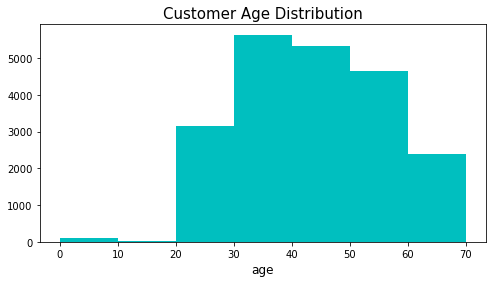

In [28]:
# Histogram of 'age' frequencies
plt.figure(figsize=(8,4))
plt.hist(credit_score['dob_years'], bins=np.arange(0,80,10), color='c')
plt.title('Customer Age Distribution', size=15)
plt.xlabel('age', size=12);

In [29]:
#Count number of rows with 0 for dob_years
(credit_score['dob_years']==0).sum()

100

In [30]:
#Get means and medians
avg_age=int(credit_score['dob_years'].mean())
med_age=credit_score['dob_years'].median()
print('The average age is:',avg_age)
print('The median age is:', med_age)

The average age is: 43
The median age is: 42.0


- 100 clients have an age of 0 which is less than 1% of the total clients. 
    - The mean and median age are very similar which indicates that the mean age is OK to use as a replacement.

**<u>Next Steps</u>:**
1. Replace dob_years==0 with mean value.

In [31]:
# Replace 0s with mean
credit_score['dob_years'] = credit_score['dob_years'].replace(0,avg_age)

# Check the result 
(credit_score['dob_years']==0).sum()

0

**Family_status field**

In [32]:
# Values for the column
credit_score['family_status'].value_counts(normalize=True)

married              0.574806
civil partnership    0.194374
unmarried            0.130782
divorced             0.055556
widow / widower      0.044482
Name: family_status, dtype: float64

- No problematic values in the family_status field.


**Gender**

In [33]:
# Let's see the values in the column
credit_score['gender'].value_counts()

F      14154
M       7247
XNA        1
Name: gender, dtype: int64

- It is unknown what XNA refers to and there is only 1 value. 

**<u>Next Steps</u>:**
1. Change XNA to "unknown".

In [34]:
#Change XNA to Unknown
credit_score['gender'] = credit_score['gender'].replace('XNA','Unknown')

# Check the result - make sure it's fixed
credit_score['gender'].value_counts()

F          14154
M           7247
Unknown        1
Name: gender, dtype: int64

**Income_type field**

In [35]:
#Values in the income_type
credit_score['income_type'].value_counts()

employee                       11050
business                        5054
retiree                         3839
civil servant                   1453
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [36]:
#Checking to see whether clients who are unemployed or students have responses in days-employed and total_income.
student_unemployed = ['student', 'unemployed']
credit_score.loc[credit_score['income_type'].isin(student_unemployed)]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3133,1,337524.466835,31,secondary education,2,married,0,M,unemployed,1,9593.119,buying property for renting out
9410,0,-578.751554,22,bachelor's degree,4,unmarried,4,M,student,0,15712.260,construction of own property
14798,0,395302.838654,45,bachelor's degree,4,civil partnership,1,F,unemployed,0,32435.602,housing renovation


A few problems with the values in the income_type field:
<ol start="1">
  <li>Entrepreneur - which only has 2 clients associated with it - is likely a subtype of business.</li>
  <li>A person can be on paternity/maternity leave and still be an employee, civil servant, business, or entrepreneur. There may be other clients on parental leave not accounted for. There is no way to know which other category to file this one case with and we cannot conduct an analysis on just one case. 
  <li>All 3 clients who are unemployed or students have values in days_employed and total_income columns which either indicates an input error or that at one point they were employed, but are no longer.</li>
  <li>In general, the process for selecting the value for income_type and definitions are unknown. 
</ol>

**<u>Next steps</u>:**
1. Remove these values (rather than replace) because the reasons for the questionable values is unknown and it is only 6 clients.

In [37]:
# Change to object type to make it easier to drop rows
credit_score['income_type'] = credit_score['income_type'].astype('object')

# Drop unwanted rows
credit_score = credit_score.query('income_type == "employee" | income_type == "business" | income_type == "retiree" | income_type == "civil servant"')

# Check the result - make sure it's fixed
credit_score['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant'], dtype=object)

### Duplicate data

In [38]:
# Checking number of duplicates
credit_score.duplicated().sum()

71

In [39]:
#Overview of duplicates
credit_score[credit_score.duplicated(keep=False)].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
120,0,NaN,46,secondary education,2,married,0,F,employee,0,NaN,university education
520,0,NaN,35,secondary education,2,civil partnership,1,F,employee,0,NaN,to have a wedding
541,0,NaN,57,secondary education,2,married,0,F,employee,0,NaN,second-hand car purchase
554,0,NaN,60,secondary education,2,married,0,M,employee,0,NaN,buy real estate
680,1,NaN,30,bachelor's degree,4,married,0,F,civil servant,0,NaN,purchase of the house for my family
1005,0,0.0,62,secondary education,2,married,0,F,retiree,0,NaN,housing renovation
1191,0,0.0,61,secondary education,2,married,0,F,retiree,0,NaN,real estate transactions
1431,0,NaN,41,secondary education,2,married,0,F,employee,0,NaN,purchase of the house for my family
1511,0,0.0,58,bachelor's degree,4,unmarried,4,F,retiree,0,NaN,supplementary education
1681,0,0.0,57,secondary education,2,civil partnership,1,F,retiree,0,NaN,having a wedding


In [40]:
# Address the duplicates, if they exist
credit_score = credit_score.drop_duplicates()

# Last check whether we have any duplicates
credit_score.duplicated().sum()

0

In [41]:
#To esnure null values are not getting in the way of identifying duplicates, calling duplicated function on table without columns containing null values
credit_score_less_col = credit_score.drop(columns=['days_employed', 'total_income'])
credit_score_less_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21325 entries, 0 to 21524
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21325 non-null  int64   
 1   dob_years         21325 non-null  int64   
 2   education         21325 non-null  object  
 3   education_id      21325 non-null  int64   
 4   family_status     21325 non-null  category
 5   family_status_id  21325 non-null  int64   
 6   gender            21325 non-null  category
 7   income_type       21325 non-null  object  
 8   debt              21325 non-null  int64   
 9   purpose           21325 non-null  object  
dtypes: category(2), int64(5), object(3)
memory usage: 1.5+ MB


In [42]:
#Count duplicates
credit_score_less_col.duplicated().sum()

3587

- There are 3,587 (about 17% ) potential duplicates that are hiding behind null values which is concerning. 
- However, since there are no unique factors in the other columns, it is conceivable that individuals would have the same entries for the columns available. 
- In this case, I would request the engineer print additional columns to the dataset to help me identify unique rows, such as date of birth + city (assuming names and social security number would not be available).

The new dataset contains 21,401 rows.
Since $$\frac{21325}{21525}>99\% $$

this loss is not concerning. The amount of null values remains the same.

### Missing values

<span style="color:teal">**Total_income**</span>


**<u>Next steps<u/>:**
1. Create an age category for clients which can help with calculating values for the total income.

In [43]:
# Create a function that calculates the age category. 
def assign_age_group(dob_years):
        
    if dob_years < 20:
        return 'below 21'
    elif dob_years <30:
        return '20-29'
    elif dob_years <40:
        return '30-39'
    elif dob_years <50:
        return '40-49'
    elif dob_years <60:
        return '50-59'
    elif dob_years <70:
        return '60-69'
    else:
        return '70+'

In [44]:
# Test if the function works
test1=18
test2=34
test3=80

if assign_age_group(test1)=='below 21' and assign_age_group(test2)=='30-39' and assign_age_group(test3)=='70+':
    print("function works")
else:
    print("function flawed")

function works


In [45]:
# Creating new column based on function
def assign_age_group(dob_years):
        
    if dob_years < 20:
        return 'below 20'
    elif dob_years <30:
        return '20-29'
    elif dob_years <40:
        return '30-39'
    elif dob_years <50:
        return '40-49'
    elif dob_years <60:
        return '50-59'
    elif dob_years <70:
        return '60-69'
    else:
        return '70+' 

 # Apply function assign_age_group    
credit_score['age_group'] = credit_score['dob_years'].apply(assign_age_group)

In [46]:
# Checking how values in the new column
credit_score.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,-8437.673028,42,bachelor's degree,4,married,0,F,employee,0,40620.102,purchase of the house,40-49
1,1,-4024.803754,36,secondary education,2,married,0,F,employee,0,17932.802,car purchase,30-39
2,0,-5623.422610,33,secondary education,2,married,0,M,employee,0,23341.752,purchase of the house,30-39
3,3,-4124.747207,32,secondary education,2,married,0,M,employee,0,42820.568,supplementary education,30-39
4,0,0.000000,53,secondary education,2,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-59
5,0,-926.185831,27,bachelor's degree,4,civil partnership,1,M,business,0,40922.170,purchase of the house,20-29
6,0,-2879.202052,43,bachelor's degree,4,married,0,F,business,0,38484.156,housing transactions,40-49
7,0,-152.779569,50,secondary education,2,married,0,M,employee,0,21731.829,education,50-59
8,2,-6929.865299,35,bachelor's degree,4,civil partnership,1,F,employee,0,15337.093,having a wedding,30-39
9,0,-2188.756445,41,secondary education,2,married,0,M,employee,0,23108.150,purchase of the house for my family,40-49


In [47]:
# Look at the mean values for income based on type
credit_score.pivot_table(index='income_type', 
                         values='total_income', 
                         aggfunc='mean', 
                         margins=True) 

,total_income
income_type,
business,32413.731796
civil servant,27318.902910
employee,25818.401986
retiree,21951.754892
All,26791.168945


In [48]:
# Look at the median values for income based on type
credit_score.pivot_table(index='income_type', 
                         values='total_income', 
                         aggfunc='median', 
                         margins=True)

,total_income
income_type,
business,27602.7875
civil servant,24067.2240
employee,22814.0140
retiree,18956.9340
All,23203.7860


NOTE: I am hesitant to replace the total_income for all retirees with 0 (as was done with days_employed) because while some may be getting a pension, these values may also be from prior to retirement.

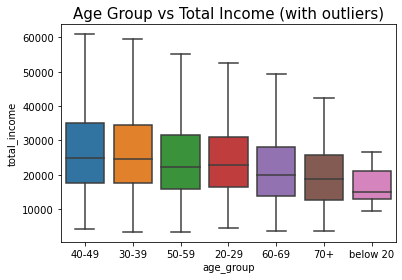

In [49]:
#checking correlation between age-group and total_income, with eliminating outliers.
sns.boxplot(x="age_group", 
            y="total_income", 
            data=credit_score, 
            showfliers = False)
plt.title('Age Group vs Total Income (with outliers)', 
          fontsize=15);

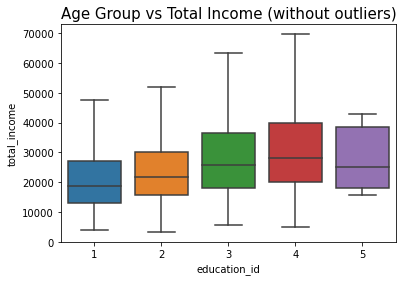

In [50]:
#Checking correlation between age-group and total_income, with eliminating outliers.
sns.boxplot(x="education_id", 
            y="total_income", 
            data=credit_score, 
            showfliers = False)

plt.title('Age Group vs Total Income (without outliers)', 
          fontsize=15);

In [51]:
credit_score['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant'], dtype=object)

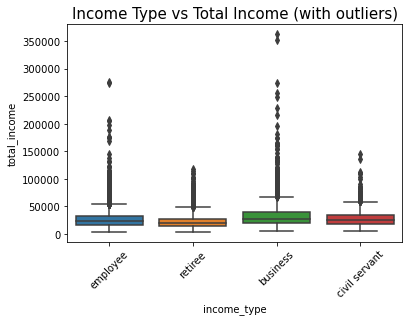

In [52]:
#Checking correlation between income_type and total_income, without eliminating outliers.
sns.boxplot(x="income_type", 
            y="total_income", 
            data=credit_score)

plt.xticks(rotation=45)
plt.title('Income Type vs Total Income (with outliers)', 
          fontsize=15);

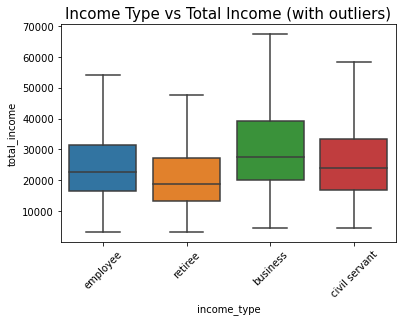

In [53]:
#change paternity/maternity leave to be 'parental leave' so neater in graph

#Checking correlation between income_type and total_income, with eliminating outliers.
sns.boxplot(x="income_type", 
            y="total_income", 
            data=credit_score, 
            showfliers = False)

plt.xticks(rotation=45)
plt.title('Income Type vs Total Income (with outliers)', 
          fontsize=15);

- Due to substantial number of outliers, mean is not a good indicator and median will be used.

**<u>Next steps</u>:**
1. Calculate median for each combination of education and income_type.
2. Calculate median for each combination of age_group and income_type.
2. Calculate median for each combination of age_group and education.

In [54]:
credit_score.pivot_table(index='income_type', 
                         columns='education_id', 
                         values='total_income', 
                         aggfunc='median', 
                         margins=True) 

education_id,1,2,3,4,5,All
income_type,,,,,,
business,21887.825,25446.2700,28790.004,32305.8750,NaN,27602.7875
civil servant,23734.287,21847.7850,25694.775,27564.4590,17822.7570,24067.2240
employee,20159.186,21839.4075,24209.430,26578.8775,31771.3210,22814.0140
retiree,16415.785,18370.6715,19221.903,23030.2470,28334.2150,18956.9340
All,18741.976,21830.2500,25664.181,28086.3810,25161.5835,23203.7860


In [55]:
credit_score.pivot_table(index='income_type', 
                         columns='age_group', 
                         values='total_income', 
                         aggfunc='median', 
                         margins=True) 

age_group,20-29,30-39,40-49,50-59,60-69,70+,below 20,All
income_type,,,,,,,,
business,25651.7930,28764.2590,28701.2180,27348.5870,29171.9890,28138.895,19321.445,27602.7875
civil servant,23611.6970,24653.6400,24747.1395,23158.6890,23390.0570,24525.224,12125.986,24067.2240
employee,21588.7985,23226.5690,23126.2980,22504.9395,23188.1785,24660.901,14575.717,22814.0140
retiree,13553.0235,18735.7160,22262.3090,19526.2050,18425.4360,17650.466,NaN,18956.9340
All,22807.0365,24709.4735,24768.1370,22195.8470,19811.3260,18751.324,14934.901,23203.7860


In [56]:
credit_score.pivot_table(index='education_id', 
                         columns='age_group', 
                         values='total_income', 
                         aggfunc='median', 
                         margins=True) 

age_group,20-29,30-39,40-49,50-59,60-69,70+,below 20,All
education_id,,,,,,,,
1,25488.9160,19542.3265,21511.5635,16922.6250,17657.4995,15013.505,NaN,18741.9760
2,21176.7800,22907.8415,22960.5920,21220.5350,18873.7640,18508.577,15761.569,21830.2500
3,22709.1490,28470.6140,29323.6730,21132.3090,28058.6760,14479.193,14575.717,25664.1810
4,25956.1640,28847.4385,30100.7975,28152.1765,25195.1730,25497.392,NaN,28086.3810
5,NaN,18187.3015,31771.3210,42945.7940,28334.2150,NaN,NaN,25161.5835
All,22807.0365,24709.4735,24768.1370,22195.8470,19811.3260,18751.324,14934.901,23203.7860


- TOTAL INCOME:
    - Age_group and total_income appear to be positively correlated, but not substantially. 
    - Education and total_income appear to be positively correlated as well, but not substantially (and clients with a bachelor degree having a slightly higher total_income than those with a graduate degree which is counter intuitive). 
    - For income_type, business has the highest level income, followed by civil servant, and employee. <br> 
<br>
- AGE:
    - Customer age adds some understanding to the total income. 
        - For example, the oddity of bachelor's degree having an overall higher income than graduate can be explained when broken down by age: people often study for their graduate degrees in their 30s, which is why the income is lower than any other age group for this category. 
    - Also, age helps to understand the difference between civil servant and employee with the 2 starting off similar at younger ages and ending at civil servants having higher income in the final age group, possibly because of pre-determined gradual increases in pay for civil servants and pensions. <br>
<br>
- All in all, it seems that education_id and age-group contribute the most value to understanding total_income.

**<u>Next steps</u>:**
1. Use education and age_group grouped to populate the missing values for total_income. 

In [57]:
#Create 'new_income' column to contain number values from 'total_income' and replace missing values.
credit_score['new_income'] = credit_score['total_income'].fillna(credit_score.groupby(['age_group','education_id'])['total_income'].transform('median'))

#Convert values to integers.
credit_score['new_income'] = credit_score['new_income'].astype(int)

# Check if it works
credit_score[credit_score['total_income'].isna()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,new_income
12,0,0.0,65,secondary education,2,civil partnership,1,M,retiree,0,NaN,to have a wedding,60-69,18873
26,0,NaN,41,secondary education,2,married,0,M,civil servant,0,NaN,education,40-49,22960
29,0,0.0,63,secondary education,2,unmarried,4,F,retiree,0,NaN,building a real estate,60-69,18873
41,0,NaN,50,secondary education,2,married,0,F,civil servant,0,NaN,second-hand car purchase,50-59,21220
55,0,0.0,54,secondary education,2,civil partnership,1,F,retiree,1,NaN,to have a wedding,50-59,21220


In [58]:
credit_score.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,new_income
count,21325.000000,19618.000000,21325.000000,21325.000000,21325.000000,21325.000000,19235.000000,21325.000000
mean,0.473998,-1896.448139,43.481360,2.512216,0.974490,0.081125,26791.168945,26468.767550
std,0.752375,2268.660976,12.219096,0.876282,1.421789,0.273034,16493.294235,15727.989791
min,0.000000,-18388.949901,19.000000,1.000000,0.000000,0.000000,3306.762000,3306.000000
25%,0.000000,-2707.275469,33.000000,2.000000,0.000000,0.000000,16482.158500,17190.000000
50%,0.000000,-1165.861485,43.000000,2.000000,0.000000,0.000000,23203.786000,22960.000000
75%,1.000000,-245.164468,53.000000,3.000000,1.000000,0.000000,32551.225000,31331.000000
max,5.000000,0.000000,75.000000,5.000000,4.000000,1.000000,362496.645000,362496.000000


- In a side-by-side comparison, it seems that the descriptive statistics are similar for the new_income and total_income columns; therefore, this change did not alter the data much and should not impact the results.

**Days_employed**

- I opted to not restore the missing values in days_employed. 
    - The column has too many problems without a clear reason of why or path to fix them. Since the column is not integral to the specific questions asked, I will leave the column as is. 
    - However, if the question asked were simply which factors are correlated with a default on the loan, days_employed would be important. 
        - For example, the analysis could demonstrate that clients with longer histories of employment are less likely to default on a loan. In this case, I would approach discuss the data irregularities with the software engineer tasked with maintaining the database and inquire as to understand how the column is updated (i.e., does the count increase each day? Or is it the number of days the client was employed at the time they received the loan).

## Categorization of data

In [59]:
# Check the unique values
print("Number of unique values for:")
print("\t children:",len(credit_score['children'].unique()))
print("\t family_status:",len(credit_score['family_status'].unique())) 
print("\t purpose:",len(credit_score['purpose'].unique())) 
print("\t new_income:",len(credit_score['total_income'].unique())) 


Number of unique values for:
	 children: 6
	 family_status: 5
	 purpose: 38
	 new_income: 19233


### Categorizing by Family status and Children

The family_status field can be broken down by 2 groups: 
1. 2 person income: family_status=="married" or "civil-partnership", and
2. 1 person income: family_status=="unmarried", "divorced", or "widow / widower".
*I recognize that married or civil partnership, does not mean that both parties are working. Therefore, these categories should be considered "potential 2 person income"

The children fields can be broken down by 2 groups:
1. children: children>0, and
2. childless: children==0

In theory, I would expect that the order of likelihood to repay the loan is (from least to greatest):
1. 1 person income, children
2. 2 person income, children OR 1 person income, 0 children
3. 2 person income, 0 children

In [60]:
# Function to categorize the data based on common topics
def credit_score_cat(row):
    children = row['children']
    family_status = row['family_status']
    
    if children==0:
        if family_status == 'married' or family_status=='civil partnership':
            return 'potential two person income, childless'
        return 'one person income, childless'
    if children>0:
        if family_status == 'married' or family_status =='civil partnership':
            return 'potential two person income, children'
        return 'one person income, children'

In [61]:
# Create a column with the categories and count the values for them
credit_score['family_cat'] = credit_score.apply(credit_score_cat, axis=1) 
credit_score.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,new_income,family_cat
0,1,-8437.673028,42,bachelor's degree,4,married,0,F,employee,0,40620.102,purchase of the house,40-49,40620,"potential two person income, children"
1,1,-4024.803754,36,secondary education,2,married,0,F,employee,0,17932.802,car purchase,30-39,17932,"potential two person income, children"
2,0,-5623.422610,33,secondary education,2,married,0,M,employee,0,23341.752,purchase of the house,30-39,23341,"potential two person income, childless"
3,3,-4124.747207,32,secondary education,2,married,0,M,employee,0,42820.568,supplementary education,30-39,42820,"potential two person income, children"
4,0,0.000000,53,secondary education,2,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-59,25378,"potential two person income, childless"


### Categorizing by Purpose

The purpose column can be divided into 4 categories:

1. property
2. education
3. wedding
4. car

In [62]:
#Create function to categorize values in purpose column
def purpose_type(string):
    if  'estate' in string or 'home' in string or 'property' in string or 'housing' in string or 'house' in string:
        return 'property'
    elif 'car' in string:
        return 'car'
    elif 'education' in string or 'university' in string or 'educating' in string or 'educated' in string:
        return 'education'
    elif 'wedding' in string:
        return 'wedding'
    else:
        return 'error'

In [63]:
#Test function
i='I love my car'
p='I have a property'

print (purpose_type(i))
print (purpose_type(p))

car
property


In [64]:
#Create purpose_type column to categorize purpose values
credit_score['purpose_cat'] = credit_score['purpose'].apply(purpose_type)

#Test whether there are any values missed by the function.
credit_score.loc[credit_score['purpose_cat'] == 'error']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,new_income,family_cat,purpose_cat


### Categorizing by new_income

In [65]:
# Summary statistics 
credit_score['new_income'].describe(include=all)

count     21325.000000
mean      26468.767550
std       15727.989791
min        3306.000000
25%       17190.000000
50%       22960.000000
75%       31331.000000
max      362496.000000
Name: new_income, dtype: float64

The field total_income will be divided into 4 categories based on range:
1. low: first quartile (<25%)
2. medium_low: second quartile (25% <= i < 50%)
3. medium_high: third quartile (50% <= i < 75%)
4. high: fourth quartile (>+75%)

In [66]:
#Creating function for categorizing into different numerical groups based on ranges
credit_score['income_cat'] = pd.qcut(credit_score.new_income, q=4,
                        labels=['low',
                                'medium low',
                                'medium high',
                                'high'])

In [67]:
# Count each categories values to see the distribution
credit_score.value_counts('income_cat')

income_cat
medium low     5635
low            5332
high           5331
medium high    5027
dtype: int64

## Checking the Hypotheses


In [68]:
# Calculating default-rate based on the number of children 
credit_score.groupby('children').agg({'new_income':'mean','debt':['mean','count']})

new_income      debt       
                  mean      mean  count
children                               
0         26089.281536  0.075460  14087
1         27103.320782  0.092157   4807
2         27203.883471  0.094100   2051
3         28803.293939  0.081818    330
4         26822.878049  0.097561     41
5         26789.555556  0.000000      9

In [69]:
# Calculating default-rate based on family status
credit_score.groupby('family_status').agg({'new_income':'mean','debt':['mean','count']})

new_income      debt       
                           mean      mean  count
family_status                                   
civil partnership  26357.426428  0.093175   4132
divorced           26879.486964  0.070648   1189
married            26699.549845  0.075461  12258
unmarried          26689.073703  0.097674   2795
widow / widower    22816.854890  0.066246    951

In [70]:
# Calculating default-rate based on family category 
credit_score.groupby('family_cat').agg({'new_income':'mean','debt':['mean','count']})

new_income      debt       
                                                mean      mean  count
family_cat                                                           
one person income, childless            25790.863823  0.081706   3892
one person income, children             26727.188878  0.097795   1043
potential two person income, childless  26203.204218  0.073075  10195
potential two person income, children   27288.184181  0.091203   6195

In [71]:
# Calculating default-rate based on income level
credit_score.groupby('income_cat').agg({'new_income':'mean','debt':['mean','count']})

new_income      debt      
                     mean      mean count
income_cat                               
low          12947.576144  0.079707  5332
medium low   20503.152440  0.089264  5635
medium high  26938.381540  0.083748  5027
high         45855.465016  0.071469  5331

In [72]:
# Calculating default-rate based on purpose_cat 
credit_score.groupby('purpose_cat').agg({'new_income':'mean','debt':['mean','count']})

new_income      debt       
                     mean      mean  count
purpose_cat                               
car          26446.422861  0.093268   4278
education    26029.951354  0.092528   3988
property     26690.857728  0.072485  10747
wedding      26234.678633  0.079152   2312

In [73]:
# Calculating default-rate based on income_cat and purpose_cat (which is equal to the mean).
credit_score.groupby(['purpose_cat','income_cat']).agg({'new_income':'mean','debt':['mean','count']})

new_income      debt      
                                 mean      mean count
purpose_cat income_cat                               
car         low          12899.858245  0.095468  1037
            medium low   20515.888141  0.093356  1189
            medium high  26948.093429  0.099589   974
            high         45565.686456  0.085343  1078
education   low          12979.506305  0.088264  1031
            medium low   20614.981256  0.105904  1067
            medium high  26909.497377  0.095488   953
            high         45661.300961  0.078975   937
property    low          12907.207661  0.067968  2663
            medium low   20473.702906  0.079297  2787
            medium high  26941.076321  0.074755  2555
            high         46163.418673  0.067834  2742
wedding     low          13154.006656  0.089850   601
            medium low   20414.658784  0.097973   592
            medium high  26958.899083  0.077064   545
            high         45245.541812  0.050523   574

**Conclusion**

1. Clients are less likely to default on their loan if they do not have children.</li>
2. A potential two person income household is significantly less likely to default than a one person income household when there are no children.
3. A potential two person income household is slightly less likely to default than a one person income household when there are  children. 
4. Clients who took out a loan to finance their property or wedding are signiciantly less likely to default than clients who took out a loan for a car or education.

The order of most likely to least likely to default  for family makeup is:

1. one person income, children
2. potential two person income, children
3. one person income, childless
4. potential two person income, childless

## General conclusions

### Limitations

1. The days_employed column was very messy and how to fix it was unclear. Therefore, and since it was not important to answering the questions in this analysis, it was not fixed. However, it could be important to determining factors which affect loan defaults in general.

2. The total_income column was missing many values for reasons unclear. The median of income when clients were grouped by age and education seemed to be the best way to fill in missing values without affecting the distribution too much.

3. It is unclear if pension for retirees is included in income.

4. The dataset lacks unique values for clients to help identify duplicate values.

5. Other important information missing from the dataset is details about the loan such as amount, interest rate, and length of time; all of which could help to understand who defaults and why.

### Summary of findings

1. Clients with no children are least likely to default, followed by the potential for a 2 income household.

7. Clients who took out a loan to finance their property or wedding are signiciantly less likely to default than clients who took out a loan for a car or education. This may be because property is an asset that often increasing in value and wedding loans can be paid back with monetary gifs from the wedding. 